## Data Processing

## Issues in current data set :-
1. Feature Encoding :- {Type}
2. Feature Scaling :- {Air Temperature},{Process Temperature},{Rotational Speed}
3. Feature Dropping :- {UDI}, {Product ID}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('predictive_maintenance.csv')
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.drop(columns=['UDI','Product ID','Failure Type'],inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [4]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.dtypes #All datatypes are optimal 

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
dtype: object

### 1. Encoding Feature :- Type -> Type_Encoded

In [6]:
encoding_map = {'L': 0, 'M': 1, 'H': 2}
df['Type_encoded'] = df['Type'].map(encoding_map)
df.drop(columns='Type',inplace=True)
df.head()
#Encoded Ordinal Type Data, L=0,M=1,H=2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded
0,298.1,308.6,1551,42.8,0,0,1
1,298.2,308.7,1408,46.3,3,0,0
2,298.1,308.5,1498,49.4,5,0,0
3,298.2,308.6,1433,39.5,7,0,0
4,298.2,308.7,1408,40.0,9,0,0


### 2. Feature Scaling :- Air Temperature, Process Temperature, Rotational Speed, Torque

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the set, it will learn the parameters
scaler.fit(df.drop(columns=['Tool wear [min]','Target','Type_encoded']))

# transform data sets
df_scaled = scaler.transform(df.drop(columns=['Tool wear [min]','Target','Type_encoded']))
df_scaled=pd.DataFrame(df_scaled)
df_scaled.rename(columns={0: 'Air Temprature',1:'Process Temprature',2:'Rotational speed [rpm]',3:'Torque [Nm]'}, inplace=True)
df_scaled.head()

,Air Temprature,Process Temprature,Rotational speed [rpm],Torque [Nm]
0,-0.952389,-0.947360,0.068185,0.282200
1,-0.902393,-0.879959,-0.729472,0.633308
2,-0.952389,-1.014761,-0.227450,0.944290
3,-0.902393,-0.947360,-0.590021,-0.048845
4,-0.902393,-0.879959,-0.729472,0.001313


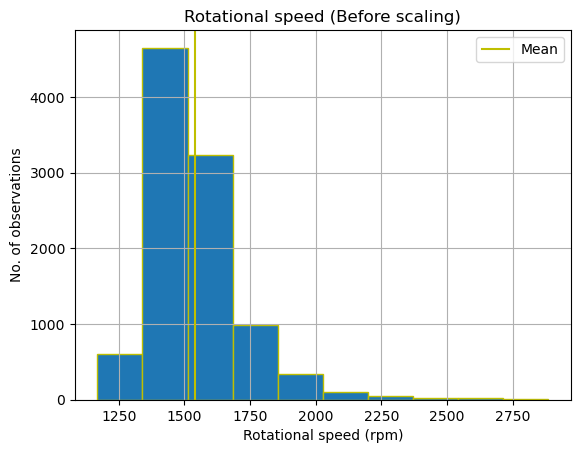

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


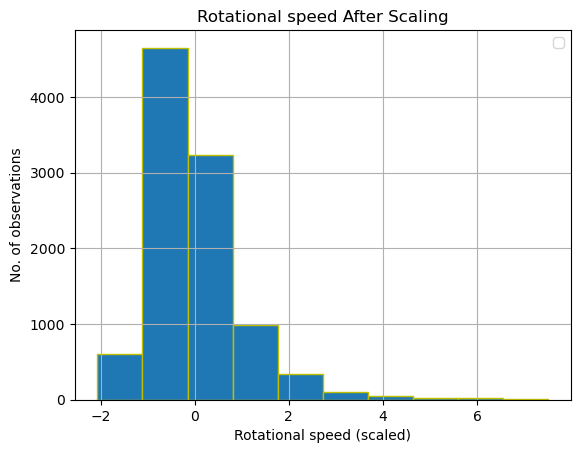

In [80]:
plt.title("Rotational speed (Before scaling)")
plt.xlabel("Rotational speed (rpm)")
plt.ylabel("No. of observations")
plt.hist(df['Rotational speed [rpm]'],edgecolor='y',align='mid')
plt.axvline(1538.7761,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data is right skewed 
plt.title("Rotational speed After Scaling")
plt.xlabel("Rotational speed (scaled)")
plt.ylabel("No. of observations")
plt.hist(df_scaled['Rotational speed [rpm]'],edgecolor='y',align='mid')
# plt.axvline(1538.7761,color='y',label='Mean')
plt.grid()
plt.legend()
plt.show() #Result :- Data is right skewed 


C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vatsal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


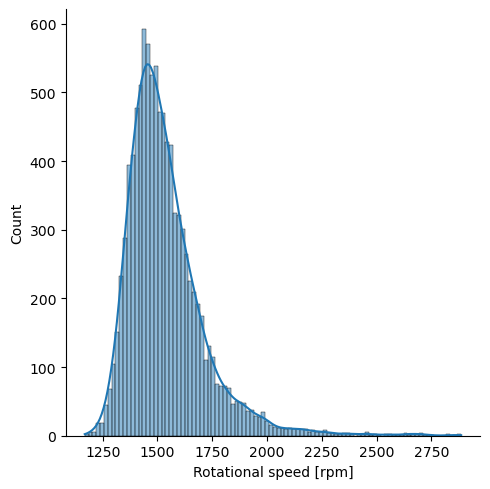

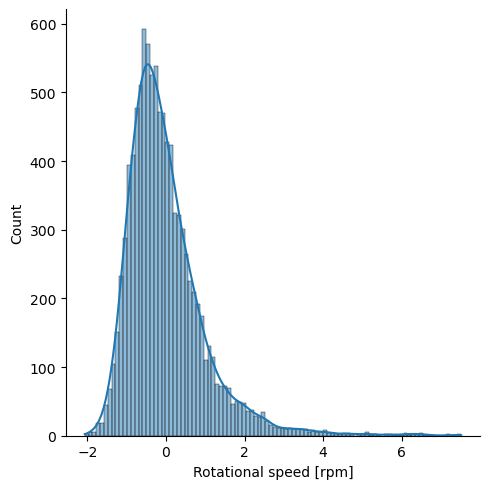

In [81]:
sns.displot(df['Rotational speed [rpm]'],kde=True)
sns.displot(df_scaled['Rotational speed [rpm]'],kde=True)

=> Scaling conducted with no loss in PDF. 

## Model Selection
Testing Logistic Regression 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
X = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Type_encoded']]  # Features
y = df['Target']                   # Target variable

Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.974
Confusion Matrix:
 [[1930    9]
 [  43   18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.30      0.41        61

    accuracy                           0.97      2000
   macro avg       0.82      0.65      0.70      2000
weighted avg       0.97      0.97      0.97      2000



## Model Visualisation

1. Confusion Matrix

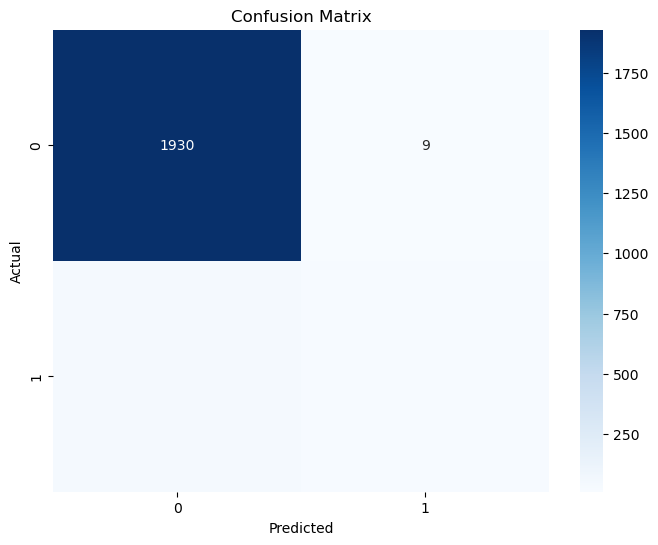

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. ROC Curve

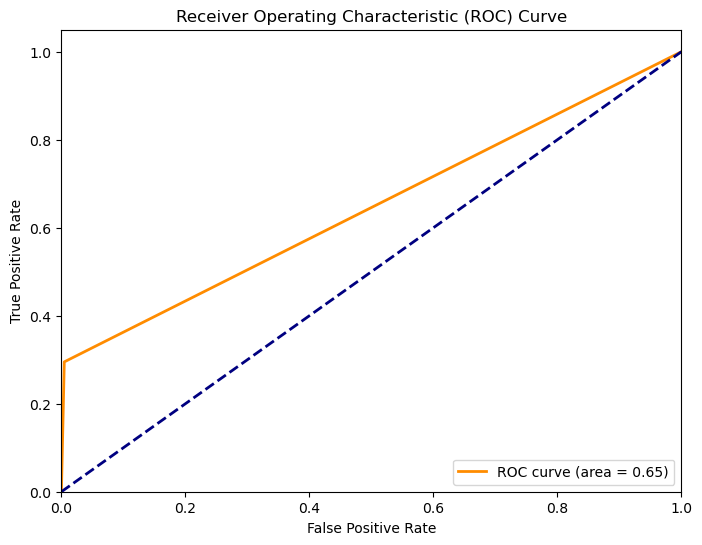

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

3. Precision-Recall Curve

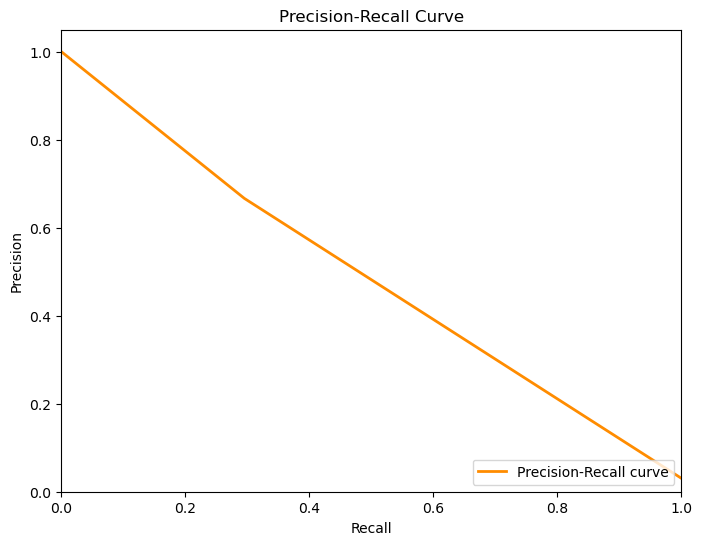

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

## Exporting Model

In [27]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming you've trained your model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)